In [1]:
import ionize
from ionize import Protein
from Bio import PDB
import numpy
from matplotlib.pyplot import *
%matplotlib inline

In [2]:
DB = PDB.PDBList().get_all_entries()

retrieving index file. Takes about 5 MB.


Could not download b'100D' from the PDB.
Could not download b'101D' from the PDB.
Could not download b'101M' from the PDB.
Could not download b'102D' from the PDB.
Could not download b'102L' from the PDB.
Could not download b'102M' from the PDB.
Could not download b'103D' from the PDB.
Could not download b'103L' from the PDB.
Could not download b'103M' from the PDB.
Could not download b'104D' from the PDB.
Could not download b'104L' from the PDB.
Could not download b'104M' from the PDB.
Could not download b'105D' from the PDB.
Could not download b'105M' from the PDB.
Could not download b'106D' from the PDB.
Could not download b'106M' from the PDB.
Could not download b'107D' from the PDB.
Could not download b'107L' from the PDB.
Could not download b'107M' from the PDB.
Could not download b'108D' from the PDB.
Could not download b'108L' from the PDB.
Could not download b'108M' from the PDB.
Could not download b'109D' from the PDB.
Could not download b'109L' from the PDB.
Could not downlo

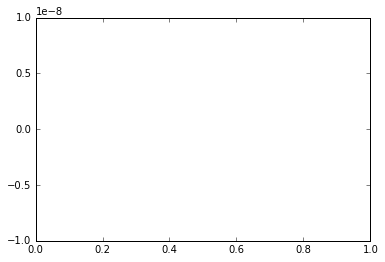

In [10]:
pH = numpy.linspace(0, 14)
x=[]
y=[]
for idx, entry in enumerate(DB): 
    try:
        my_prot = Protein(entry)
        mob = [my_prot.mobility(p) for p in pH]
        print(mob)
        x.extend(pH)
        y.extend(mob)
        plot(pH, mob)
    except Exception as e:
        print(e)
    if idx>=1000:
        break
ylim(-1e-8, 1e-8)
show()

Make 2d hist
------------

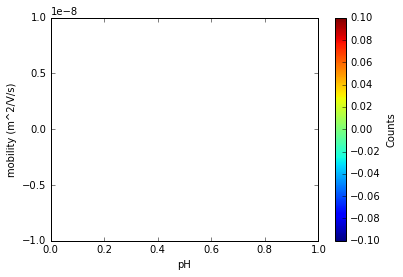

In [7]:
nbins = 500
H, xedges, yedges = numpy.histogram2d(x,y,bins=nbins)
 
# H needs to be rotated and flipped
H = numpy.rot90(H)
H = numpy.flipud(H)
 
# Mask zeros
Hmasked = numpy.ma.masked_where(H==0,H) # Mask pixels with a value of zero
 
# Plot 2D histogram using pcolor
fig2 = figure()
pcolormesh(xedges,yedges,Hmasked)
xlabel('pH')
ylabel('mobility (m^2/V/s)')
cbar = colorbar()
cbar.ax.set_ylabel('Counts')
ylim(-1e-8, 1e-8)
show()
